<a href="https://colab.research.google.com/github/brendencrogers/lab-1-phase-2-brendencrogers/blob/main/Copy_of_DATA_301_Lab_1B_Brenden_Rogers_%26_Sam_Wathen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

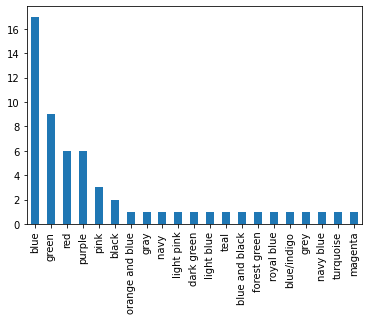

In [2]:
# TYPE YOUR CODE HERE.
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
url = url.replace("/edit#gid=", "/export?format=csv&gid=")

df_class = pd.read_csv(url)
df_class["color"] = df_class["What is your favorite color?"].astype(str)
df_class.color = df_class.color.str.lower()
df_class["color"].value_counts().plot.bar()

This graph shows that blue is by far the favorite color of the students in DATA301. Besides blue and a few other common colors like green and red, there are a lot of smaller colors that only have one response each.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

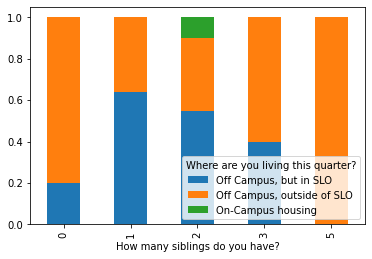

In [4]:
# TYPE YOUR CODE HERE.

joint_siblings_living = pd.crosstab(df_class["How many siblings do you have?"], df_class["Where are you living this quarter?"], normalize=True)
joint_siblings_living

siblings = joint_siblings_living.sum(axis=1)
cond_siblings_living = joint_siblings_living.divide(siblings, axis=0)
cond_siblings_living.plot.bar(stacked=True)

There does appear to be a relationship between the number of siblings that someone has and whether or not they live in SLO. As can be seen from the plot, people with 3 siblings are much less likely to line in SLO as opposed to those with only 1 sibling. Students with only 1 and 2 siblings are both very likely to be living in SLO, whether on or off campus. On the other hand, students with either no siblings or 3 and more siblings are much more likely to live outside of SLO.


## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

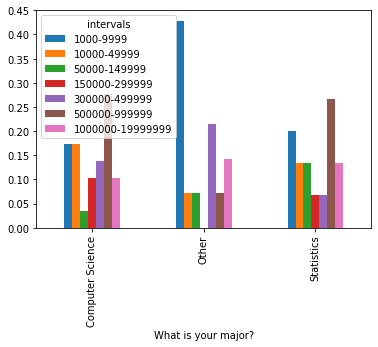

In [6]:
# TYPE YOUR CODE HERE.

df_updated_survey = df_class.copy()

cut_bins1 = [0, 1000, 10000, 50000, 150000, 300000, 500000, 1000000, 20000000]
cut_labels = ['0-999', '1000-9999', '10000-49999', '50000-149999', '150000-299999', '300000-499999', '500000-999999', '1000000-19999999']
df_golf = df_updated_survey["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"]
df_updated_survey["intervals"] = pd.cut(df_golf, bins=cut_bins1, labels=cut_labels)

df_updated_survey
joint_golf_siblings = pd.crosstab(df_updated_survey["What is your major?"], df_updated_survey["intervals"], normalize=True)
siblings = joint_golf_siblings.sum(axis=1)
cond_siblings_golf = joint_golf_siblings.divide(siblings, axis=0)
cond_siblings_golf.plot.bar()

One interesting relationship I noticed with the golf ball estimates was the large difference between different majors. Computer science and statistics majors mostly agreed with the majority of their guesses falling in the 500000 - 999999 range. On the otherhand, students with 'other' major overwhelmingly guessed numbers in the 1000-9999 range, which is considerably less than the previously mentioned 500000-999999 range. Because 'other' could mean any other major, it is hard to draw any conclusions on whether major and previous classwork played a part in this disparity.

## Question 4

What is the conditional probability of living outside of SLO given a favorite color of blue?

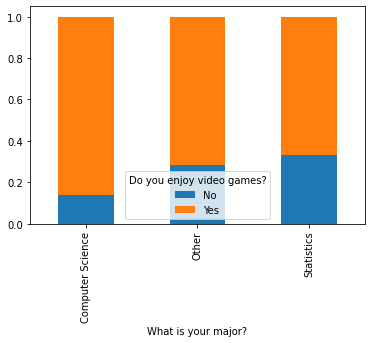

In [7]:
# TYPE YOUR CODE HERE.

joint_major_vg = pd.crosstab(df_class["What is your major?"], df_class["Do you enjoy video games?"], normalize=True)
major = joint_major_vg.sum(axis=1)
cond_major_vg = joint_major_vg.divide(major, axis=0)
cond_major_vg.plot.bar(stacked=True)

This data indicates that computer science majors are noticably less likely to dislike video games than statistics majors. Less than 20% of computer science majors said they do not enjoy video games, whereas almost 40% of statistics majors said they do not enjoy video games. These results were about what I expected, as computer science majors are typically more likely to spend time in front of their computers and are thus exposed more to video game culture.